600


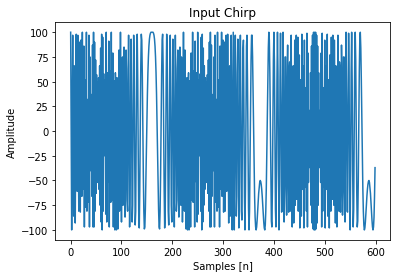

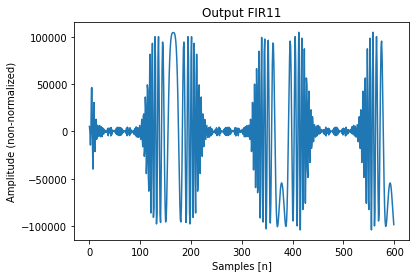

In [3]:
from pynq import Overlay
from pynq import MMIO
import ctypes
import matplotlib.pyplot as plt

ol = Overlay("/home/xilinx/jupyter_notebooks/Week1/FIR11/design_1_wrapper.bit")
ol.download()

mul_ip=MMIO(0x43C00000, 0x10000)

data_out = list() 
data_in = list()

#Read from input, compute and store in another file
with open("/home/xilinx/jupyter_notebooks/Week1/FIR11/input.dat", "r") as fin:
    with open("/home/xilinx/jupyter_notebooks/Week1/FIR11/output.dat", "w+") as fout:
        for line in fin:
            mul_ip.write(0x18, int(line))
            mul_ip.write(0x00, 1)
            #fout.write(str(ctypes.c_int32(mul_ip.read(0x10)).value) + "\n")
            #print(str(ctypes.c_int32(mul_ip.read(0x10)).value) + "\n")
            
            data_out.append(ctypes.c_int32(mul_ip.read(0x10)).value)
            data_in.append(int(line))
            
plt.plot(data_in)
plt.title('Input Chirp')
plt.xlabel('Samples [n]')
plt.ylabel('Amplitude')

plt.show()
plt.plot(data_out)
plt.title('Output FIR11')
plt.xlabel('Samples [n]')
plt.ylabel('Amplitude (non-normalized)')
plt.show()
